In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load
library(tidyverse) # metapackage of all tidyverse packages
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "dataencodedchris"                           
[2] "house-prices-advanced-regression-techniques"
[3] "traindata1"                                 
[4] "traindataencoded"

In [2]:
library(ggplot2)
library(moments)

In [3]:
library(gridExtra)
library(scales)
library(knitr)
library(ggplot2)
library(plyr)
library(dplyr)
library(corrplot)
library(caret)
library(gridExtra)
library(scales)
library(Rmisc)
library(ggrepel)
library(randomForest)
library(psych)
library(xgboost)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor


------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following object is masked from ‘package:purrr’:

    compact


corrplot 0.84 loaded

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lif

****ANALYSE EXPLORATOIRE DES VARIABLES DE LA PARTIE 2****

In [4]:
dataEncodedOutlierLogChris <- read.csv("../input/dataencodedchris/dataEncodedOutlierLogChris.csv",stringsAsFactors=FALSE)

In [5]:
head(dataEncodedOutlierLogChris)

,MSSubClass,LotFrontage,LotArea,Street,Alley,Utilities,Condition1,Condition2,HouseStyle,OverallQual,⋯,SaleCondition.AdjLand,SaleCondition.Alloca,SaleCondition.Family,SaleCondition.Normal,SaleCondition.Partial,TotalSqFeet,TotalPorchSF,PoolArea,PoolQC,SalePrice
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,0,65,8450,1,1,1,1,1,0,7,⋯,0,0,0,1,0,1710,61,0,1,12.24769
2,1,80,9600,1,1,1,0,1,1,6,⋯,0,0,0,1,0,1262,0,0,1,12.10901
3,0,68,11250,1,1,1,1,1,0,7,⋯,0,0,0,1,0,1786,42,0,1,12.31717
4,1,60,9550,1,1,1,1,1,0,7,⋯,0,0,0,0,0,1717,307,0,1,11.84940
5,0,84,14260,1,1,1,1,1,0,8,⋯,0,0,0,1,0,2198,84,0,1,12.42922
6,1,85,14115,1,1,1,1,1,0,5,⋯,0,0,0,1,0,1362,350,0,1,11.87060


In [6]:
summary(dataEncodedOutlierLogChris)

   MSSubClass      LotFrontage        LotArea           Street      
 Min.   :0.0000   Min.   : 21.00   Min.   :  1300   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.: 60.00   1st Qu.:  7544   1st Qu.:1.0000  
 Median :1.0000   Median : 70.00   Median :  9475   Median :1.0000  
 Mean   :0.7366   Mean   : 69.96   Mean   : 10460   Mean   :0.9959  
 3rd Qu.:1.0000   3rd Qu.: 80.00   3rd Qu.: 11600   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :313.00   Max.   :215245   Max.   :1.0000  
     Alley          Utilities        Condition1       Condition2    
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:1.0000   1st Qu.:1.0000   1st Qu.:1.0000   1st Qu.:1.0000  
 Median :1.0000   Median :1.0000   Median :1.0000   Median :1.0000  
 Mean   :0.9376   Mean   :0.9993   Mean   :0.9122   Mean   :0.9904  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
   HouseStyle      OverallQual    

In [7]:
str(dataEncodedOutlierLogChris)

'data.frame':	1458 obs. of  141 variables:
 $ MSSubClass                 : int  0 1 0 1 0 1 1 0 1 1 ...
 $ LotFrontage                : int  65 80 68 60 84 85 75 80 51 50 ...
 $ LotArea                    : int  8450 9600 11250 9550 14260 14115 10084 10382 6120 7420 ...
 $ Street                     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Alley                      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Utilities                  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Condition1                 : int  1 0 1 1 1 1 1 1 0 0 ...
 $ Condition2                 : int  1 1 1 1 1 1 1 1 1 0 ...
 $ HouseStyle                 : int  0 1 0 0 0 0 1 0 0 0 ...
 $ OverallQual                : int  7 6 7 7 8 5 8 7 7 5 ...
 $ OverallCond                : int  5 8 5 5 5 5 5 6 5 6 ...
 $ RoofStyle                  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ RoofMatl                   : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Exterior1st                : int  1 0 1 0 1 1 1 0 1 0 ...
 $ Exterior2nd                : int  1 0 1 0 1 1 1 0 0 0 .

### Encodage des variables: ExterQual, ExterCond, HeatingQC, BsmtQual,BsmtCond,BsmtExposure, BsmtFinType1 ,BsmtFinType2, KitchenQual

In [ ]:
dataEncodedOutlierLogChris$ExterQual <- fct_recode(dataEncodedOutlierLogChris$ExterQual,"5" = "Ex", "4"="Gd", "3"="TA", "2"="Fa")

dataEncodedOutlierLogChris$ExterCond <- fct_recode(dataEncodedOutlierLogChris$ExterCond,"5" = "Ex", "4"="Gd", "3"="TA", "2"="Fa", "1"="Po")

dataEncodedOutlierLogChris$HeatingQC <- fct_recode(dataEncodedOutlierLogChris$HeatingQC,"5" = "Ex", "4"="Gd", "3"="TA", "2"="Fa", "1"="Po")

dataEncodedOutlierLogChris$BsmtQual <- fct_recode(dataEncodedOutlierLogChris$BsmtQual,"5" = "Ex", "4"="Gd", "3"="TA", "2"="Fa", "0"="NoBs") 

dataEncodedOutlierLogChris$BsmtCond <- fct_recode(dataEncodedOutlierLogChris$BsmtCond, "4"="Gd", "3"="TA", "2"="Fa", "1"="Po", "0"="NoBs")

dataEncodedOutlierLogChris$BsmtExposure <- fct_recode(dataEncodedOutlierLogChris$BsmtExposure, "4"="Gd", "3"="Av", "2"="Mn", "1"="No", "0"="NoBs")

dataEncodedOutlierLogChris$BsmtFinType1 <- fct_recode(dataEncodedOutlierLogChris$BsmtFinType1, "6"="GLQ", "5"="ALQ", "4"="BLQ", "3"="Rec", "2"="LwQ", 
                                     "1"="Unf", "0"="NoBs")

dataEncodedOutlierLogChris$BsmtFinType2 <- fct_recode(dataEncodedOutlierLogChris$BsmtFinType2, "6"="GLQ", "5"="ALQ", "4"="BLQ", "3"="Rec", "2"="LwQ", 
                                     "1"="Unf", "0"="NoBs")

dataEncodedOutlierLogChris$KitchenQual <- fct_recode(dataEncodedOutlierLogChris$KitchenQual,"5" = "Ex", "4"="Gd", "3"="TA", "2"="Fa") 

In [8]:
dataEncodedOutlierLogChris = subset(dataEncodedOutlierLogChris, select=-c(Electrical.FuseA,Electrical.FuseF,Electrical.FuseP,Electrical.Mix,Electrical.SBrkr))

In [9]:
train_data= read.csv("../input/house-prices-advanced-regression-techniques/train.csv",stringsAsFactors=FALSE)
train_data<- train_data[-c(524, 1299),]

In [10]:
dim(train_data)
print(names(train_data))

[1] 1458   81

 [1] "Id"            "MSSubClass"    "MSZoning"      "LotFrontage"  
 [5] "LotArea"       "Street"        "Alley"         "LotShape"     
 [9] "LandContour"   "Utilities"     "LotConfig"     "LandSlope"    
[13] "Neighborhood"  "Condition1"    "Condition2"    "BldgType"     
[17] "HouseStyle"    "OverallQual"   "OverallCond"   "YearBuilt"    
[21] "YearRemodAdd"  "RoofStyle"     "RoofMatl"      "Exterior1st"  
[25] "Exterior2nd"   "MasVnrType"    "MasVnrArea"    "ExterQual"    
[29] "ExterCond"     "Foundation"    "BsmtQual"      "BsmtCond"     
[33] "BsmtExposure"  "BsmtFinType1"  "BsmtFinSF1"    "BsmtFinType2" 
[37] "BsmtFinSF2"    "BsmtUnfSF"     "TotalBsmtSF"   "Heating"      
[41] "HeatingQC"     "CentralAir"    "Electrical"    "X1stFlrSF"    
[45] "X2ndFlrSF"     "LowQualFinSF"  "GrLivArea"     "BsmtFullBath" 
[49] "BsmtHalfBath"  "FullBath"      "HalfBath"      "BedroomAbvGr" 
[53] "KitchenAbvGr"  "KitchenQual"   "TotRmsAbvGrd"  "Functional"   
[57] "Fireplaces"    "FireplaceQu"

In [11]:
dataEncodedOutlierLogChris$Electrical <- train_data$Electrical

In [12]:
print(names(dataEncodedOutlierLogChris))

  [1] "MSSubClass"                  "LotFrontage"                
  [3] "LotArea"                     "Street"                     
  [5] "Alley"                       "Utilities"                  
  [7] "Condition1"                  "Condition2"                 
  [9] "HouseStyle"                  "OverallQual"                
 [11] "OverallCond"                 "RoofStyle"                  
 [13] "RoofMatl"                    "Exterior1st"                
 [15] "Exterior2nd"                 "MasVnrArea"                 
 [17] "AgeBuilt"                    "AgeRemodAdd"                
 [19] "ExterQual"                   "ExterCond"                  
 [21] "BsmtQual"                    "BsmtCond"                   
 [23] "BsmtExposure"                "BsmtFinType1"               
 [25] "BsmtFinSF1"                  "BsmtFinType2"               
 [27] "BsmtFinSF2"                  "BsmtUnfSF"                  
 [29] "Heating"                     "HeatingQC"                  
 [31] "Cen

In [13]:
str(train_data$Electrical)

 chr [1:1458] "SBrkr" "SBrkr" "SBrkr" "SBrkr" "SBrkr" "SBrkr" "SBrkr" ...


In [ ]:
#train_data$Electrical[is.na(train_data$Electrical)] <- names(sort(-table(train_data$Electrical)))[1]

In [14]:
dataEncodedOutlierLogChris$Electrical[is.na(dataEncodedOutlierLogChris$Electrical)] <- names(sort(-table(dataEncodedOutlierLogChris$Electrical)))[1]

In [ ]:
#boxplot(dataEncodedOutlierLogChris$Electrical,dataEncodedOutlierLogChris£$SalePrice)

### Encodage de la variable Electrical .
On regroupe Fuse A et Fuse F ainsi que FuseP et Mix.On a au final trois modalités : FuseAF, FusePMix, SBkr

In [ ]:
#dataEnc= train_data

In [15]:
dataEnc = dataEncodedOutlierLogChris

In [16]:
dataEnc$Electrical[dataEnc$Electrical %in% c("FuseP","Mix")] <- "FusePMix"
table(dataEnc$Electrical)



   FuseA    FuseF FusePMix    SBrkr 
      94       27        4     1333 

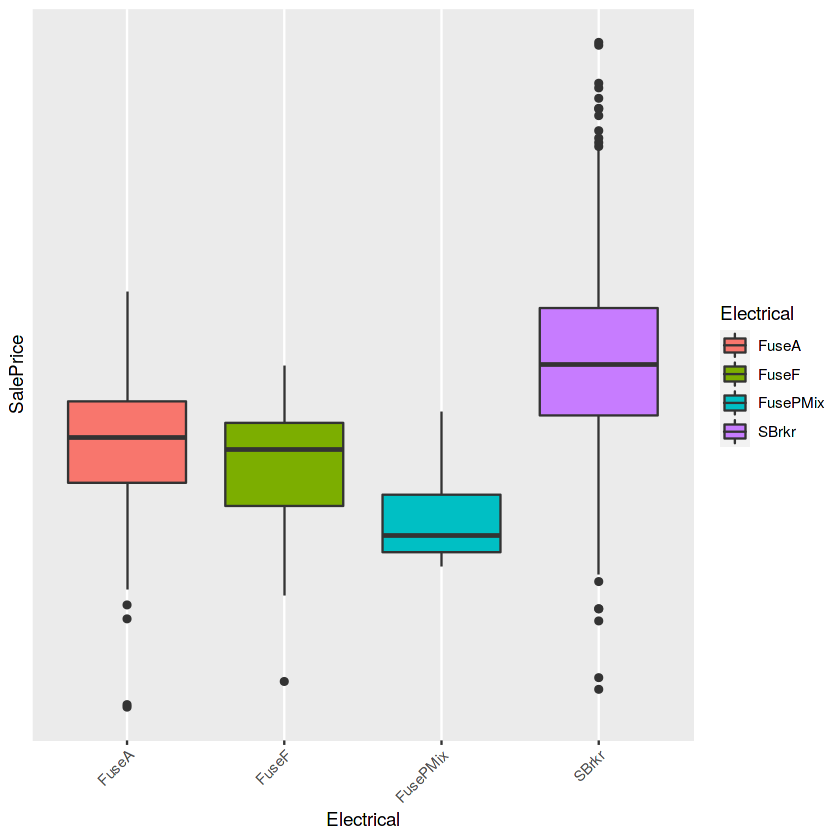

In [17]:

ggplot(data=dataEnc, aes_string(x='Electrical', fill='Electrical'), y=SalePrice) +
        geom_boxplot(aes(y=SalePrice)) + 
        labs(x='Electrical') +
        theme(axis.text.x = element_text(angle = 45, hjust = 1))+
        scale_y_continuous(breaks= seq(0, 800000, by=50000), labels = scales::comma)

In [18]:
dataEnc$Electrical[dataEnc$Electrical %in% c("FuseA", "FuseF")] <- "FuseAF"
#dataEncodedOutlierLogChris$Electrical[dataEncodedOutlierLogChris$Electrical %in% c("FuseP", "Mix")] <- "FusePMix"

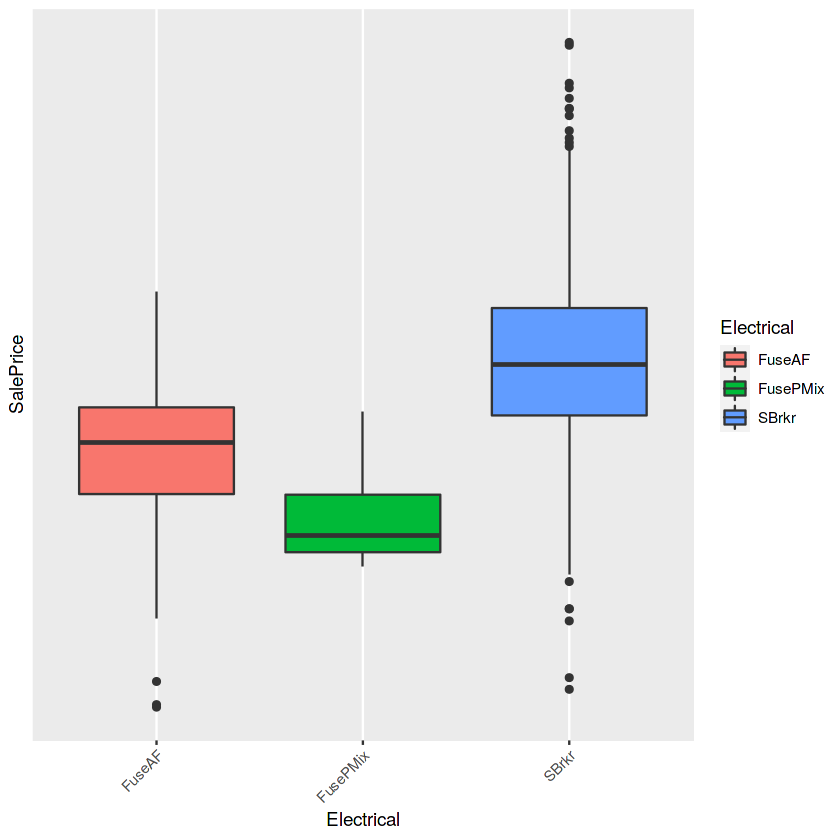

In [19]:
ggplot(data=dataEnc, aes_string(x='Electrical', fill='Electrical'), y=SalePrice) +
        geom_boxplot(aes(y=SalePrice)) + 
        labs(x='Electrical') +
        theme(axis.text.x = element_text(angle = 45, hjust = 1))+
        scale_y_continuous(breaks= seq(0, 800000, by=50000), labels = scales::comma)

In [20]:
for(unique_value in unique(dataEnc$Electrical )){
dataEnc[paste("Electrical ", unique_value, sep = ".")] <- ifelse(dataEnc$Electrical  == unique_value, 1, 0)
} 

In [21]:
table(dataEnc$CentralAir)


   0    1 
  95 1363 

In [ ]:
#dataEnc$Heating <- train_data$Heating
#dataEnc$Heating[data$Heating %in% c("Floor", "OthW", "Wall", "Roll","Grav","GasW","Others")] <- "Others"

In [22]:
#GasA=1 et Others=0
table(dataEnc$Heating)


   0    1 
  32 1426 

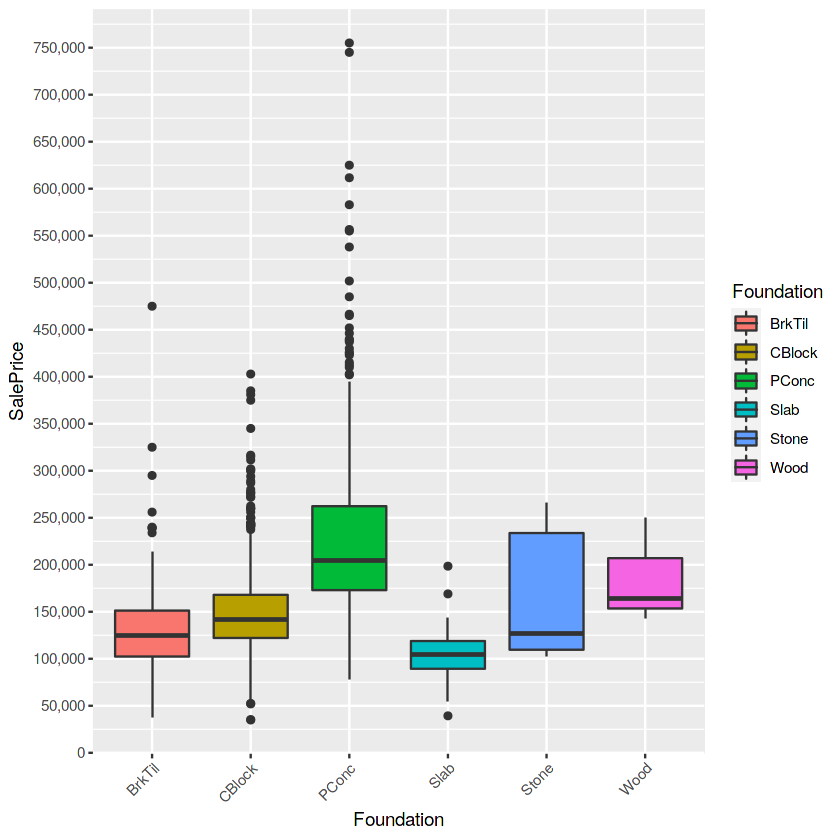

In [25]:
ggplot(data=train_data, aes_string(x='Foundation', fill='Foundation'), y=SalePrice) +
        geom_boxplot(aes(y=SalePrice)) + 
        labs(x='Foundation') +
        theme(axis.text.x = element_text(angle = 45, hjust = 1))+
        scale_y_continuous(breaks= seq(0, 800000, by=50000), labels = scales::comma)

In [27]:
table(train_data$Foundation)


BrkTil CBlock  PConc   Slab  Stone   Wood 
   146    634    645     24      6      3 

In [29]:
dataEnc= subset(dataEnc, select=-c(Foundation.BrkTil,Foundation.CBlock,Foundation.PConc,Foundation.Slab,Foundation.Stone,Foundation.Wood))

### **Encodage de la variable Foundation**
J'ai regroupé BrkTil et Stone ainsi que CBlock et Wood

In [30]:
dataEnc$Foundation <- train_data$Foundation
dataEnc$Foundation[dataEnc$Foundation %in% c("BrkTil", "Stone")] <- "BrkTilStone"
dataEnc$Foundation[dataEnc$Foundation %in% c("CBlock", "Wood")] <- "CBlockWood"

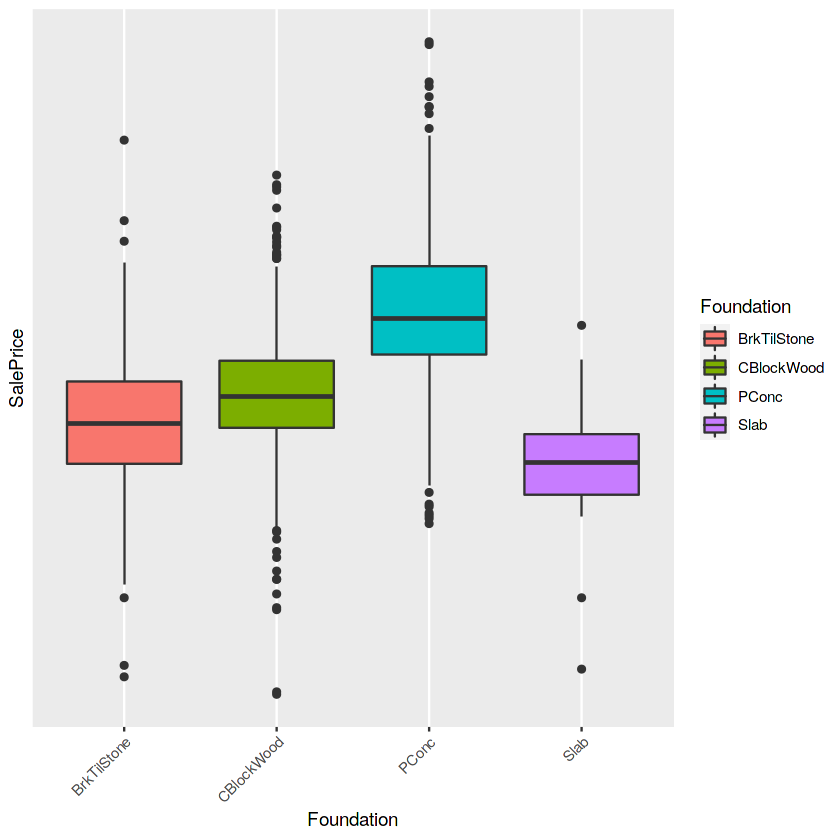

In [31]:
ggplot(data=dataEnc, aes_string(x='Foundation', fill='Foundation'), y=SalePrice) +
        geom_boxplot(aes(y=SalePrice)) + 
        labs(x='Foundation') +
        theme(axis.text.x = element_text(angle = 45, hjust = 1))+
        scale_y_continuous(breaks= seq(0, 800000, by=50000), labels = scales::comma)

In [34]:
for(unique_value in unique(dataEnc$Foundation)){
dataEnc[paste("Foundation", unique_value, sep = ".")] <- ifelse(dataEnc$Foundation  == unique_value, 1, 0)
}

In [36]:
str(dataEnc$Foundation)

 chr [1:1458] "PConc" "CBlockWood" "PConc" "BrkTilStone" "PConc" ...


In [37]:
dataEnc= subset(dataEnc, select=-c(Foundation,Electrical))

In [38]:
dim(dataEnc)

[1] 1458  137

In [39]:
write.csv(dataEnc,"./train_df2_encoded.csv", row.names = TRUE)

In [ ]:
dataEnc = read.csv("../input/traindf2encoded/train_df2_encoded (1).csv")

****LINEAR REGRESSION (STEPWISE)****

In [ ]:
#model_forward <- step(lm(formula = SalePrice ~ ., data = train_set), direction = "forward")
#model_backward <- step(lm(formula = SalePrice ~ ., data = train_set), direction = "backward")
model_both <- step(lm(formula = SalePrice ~ ., data = train_set), direction = "both")

In [ ]:
set.seed(123)
# Extraction des échantillons
test.ratio = 0.30 # part de l'échantillon test
npop  = nrow(dataEnc) # nombre de lignes dans les données
ntest  = ceiling(npop*test.ratio) # taille de l’échantillon test
testi   = sample(1:npop, ntest) # indices de l'échantillon test
appri  = setdiff(1:npop, testi) # indices de l’échant. d’apprentissage
# Construction des  ́echantillons avec les variables explicatives
dataApp   = dataEnc[appri, ] # construction de l’échantillon d’apprentissage
dataTest  = dataEnc[testi, ] # construction de l’échantillon test

In [ ]:
reslm <- lm(SalePrice~.,data=dataApp)

In [ ]:
print(summary(reslm))

On remarque toujours des NA au niveau de certaines variables.

In [ ]:
#model_forward <- step(lm(formula = SalePrice ~ ., data = dataEnc), direction = "forward")
#model_backward <- step(lm(formula = SalePrice ~ ., data = train_set), direction = "backward")
model_both <- step(lm(formula = SalePrice ~ ., data = dataEnc), direction = "both")

In [ ]:
# 1. The regression model is linear - YES
plot(model_both, 1) #Residuals vs Fitted -> horizontal line shows almost linear relationship

In [ ]:
# 2. The mean of residuals is zero - YES 
format(mean(model_both$residuals), scientific=F) # (mean of residuals is approximately zero, this assumption holds true for this model)


In [ ]:
# 3. Homoscedasticity of residuals or equal variance - NO
plot(model_both, 3) #Scale Location -> heteroscedascity

In [ ]:
# 4. Residuals are normally distributed -NO
plot(model_both, 2) #Normal QQ -> not normal pattern

In [ ]:
# 5. No autocorrelation of residuals - YES
acf(model_both$residuals) #the very first line (to the left) shows the correlation of residual with itself (Lag0), therefore, it will always be equal to 1. Correlation values drop below the dashed blue line from lag1 itself. So autocorrelation can’t be confirmed.

# test for randomness, H0:is random, H1:is pattern
lawstat::runs.test(model_both$residuals)

# Durbin-Watson test, H0:no autocorrelation, H1: there is autocorrelation
lmtest::dwtest(model_both)

In [ ]:
library(car)

In [ ]:
SalePrice_App1 = predict(reslm, newdata=dataApp)

In [ ]:
set.seed(123)
# Extraction des échantillons
test.ratio = 0.30 # part de l'échantillon test
npop  = nrow(dataEnc) # nombre de lignes dans les données
ntest  = ceiling(npop*test.ratio) # taille de l’échantillon test
testi   = sample(1:npop, ntest) # indices de l'échantillon test
appri  = setdiff(1:npop, testi) # indices de l’échant. d’apprentissage
# Construction des  ́echantillons avec les variables explicatives
dataApp   = dataEnc[appri, ] # construction de l’échantillon d’apprentissage
dataTest  = dataEnc[testi, ] # construction de l’échantillon test

In [ ]:
train_y = dataEnc$SalePrice
train_x<-as.matrix(dataEnc[-156])

In [ ]:
#λ=0 is like linear regression so higher values are better. But also λ must minimize the cross-validated sum of squared residuals so it can not be to high -> cross-validation 
#lambda values to be tried
lambdas <- 10^seq(-4, 5, length.out = 100)

In [ ]:
install.packages("matrix")
library(matrix)
library(glmnet)

In [ ]:
#finding the optimal lambda, using cross validation glmnet
set.seed(999)
ridge <- cv.glmnet(train_x, train_y, alpha = 0, lambda = lambdas)
lambda <- ridge$lambda.min
lambda

In [ ]:
plot(ridge)